**About Delhivery**
Delhivery is an Indian logistics and supply chain company, based in Gurgaon, India

Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.

The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.


**Problem Statement**

The company wants to understand and process the data coming out of data engineering pipelines:

• Clean, sanitize and manipulate data to get useful features out of raw fields

• Make sense out of the raw data and help the data science team to build forecasting models on it

# Loading Dataset and Performing EDA

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats



In [ ]:
# Loading the Dataset from Drive
!gdown 1CthBvJ4wy_gcTveQVO6F8yp1RA6EHn4-



Downloading...
From: https://drive.google.com/uc?id=1CthBvJ4wy_gcTveQVO6F8yp1RA6EHn4-
To: /content/delhivery_data.csv
100% 55.6M/55.6M [00:01<00:00, 47.5MB/s]


In [ ]:
df=pd.read_csv("delhivery_data.csv")
print("Shape :",df.shape)
df.head()

Shape : (144867, 24)


,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       



*   Need to convert trip_creation_time	,od_start_time,cutoff_start_time in pandas timestamp


*   Rename columns like source_center to source_id,destination center to destination_id
*   Unnesting of columns source_name,destination_name to extract city,state and area


*  source_name and destination_name contains null values



In [ ]:
(((df.isnull().sum())/df.shape[0])*100).sort_values(ascending=False)

,0
source_name,0.202254
destination_name,0.180165
data,0.000000
cutoff_factor,0.000000
segment_osrm_distance,0.000000
segment_osrm_time,0.000000
segment_actual_time,0.000000
factor,0.000000
osrm_distance,0.000000
osrm_time,0.000000



*  Dropping Null Values



In [ ]:
df = df.dropna(how='any')
df = df.reset_index(drop=True)

In [ ]:
df['data'].value_counts()

,count
data,
training,104632
test,39684


In [ ]:
df['trip_uuid'].nunique()

14787



*   There are 14787 Unique Trip IDs in the dataset



In [ ]:
df['trip_uuid'].unique()

array(['trip-153741093647649320', 'trip-153768492602129387',
       'trip-153693976643699843', ..., 'trip-153761584139918815',
       'trip-153718412883843340', 'trip-153746066843555182'], dtype=object)

In [ ]:
df['source_name'].value_counts().head(20)

,count
source_name,
Gurgaon_Bilaspur_HB (Haryana),23267
Bangalore_Nelmngla_H (Karnataka),9975
Bhiwandi_Mankoli_HB (Maharashtra),9088
Pune_Tathawde_H (Maharashtra),4061
Hyderabad_Shamshbd_H (Telangana),3340
Kolkata_Dankuni_HB (West Bengal),2612
Chandigarh_Mehmdpur_H (Punjab),2450
Surat_HUB (Gujarat),2189
Delhi_Airport_H (Delhi),1997




*   Need to extract state,name,city,place,place code from source name and destination name as well.



In [ ]:
# Converting datetime columns into pandas datetime

df['od_start_time']=pd.to_datetime(df['od_start_time'])
df['od_end_time']=pd.to_datetime(df['od_end_time'])
df['trip_creation_time']=pd.to_datetime(df['trip_creation_time'])

Converting above columns into pandas datetime

In [ ]:
df['data'].unique()

array(['training', 'test'], dtype=object)

In [ ]:
df['route_type'].unique()

array(['Carting', 'FTL'], dtype=object)

In [ ]:
df[df['trip_uuid']=='trip-153741093647649320']

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000
5,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 06:15:58,10.403038,15.0,11.0,12.1171,1.363636,15.0,11.0,12.1171,1.363636
6,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 05:47:29,18.045481,44.0,17.0,21.2890,2.588235,28.0,6.0,9.1719,4.666667
7,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 05:25:58,28.061896,65.0,29.0,35.8252,2.241379,21.0,11.0,14.5362,1.909091
8,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 05:15:56,38.939167,76.0,39.0,47.1900,1.948718,10.0,10.0,11.3648,1.000000
9,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 04:49:20,43.595802,102.0,45.0,53.2334,2.266667,26.0,6.0,6.0434,4.333333


we need to group the data as trip details are in multiple rows so we will group by using trid id,source name,source destination

In [ ]:
# Grouping by segment
'''
Create a unique identifier for different segments of a trip based on the combination of the trip_uuid, source_center,
and destination_center and name it as segment_key.

'''
df['segment_key'] = df['trip_uuid'] + df['source_center'] + df['destination_center']

segment_cols = ['segment_actual_time', 'segment_osrm_distance', 'segment_osrm_time']

for col in segment_cols:
    df[col + '_sum'] = df.groupby('segment_key')[col].cumsum()


df[[col + '_sum' for col in segment_cols]]

,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,14.0,11.9653,11.0
1,24.0,21.7243,20.0
2,40.0,32.5395,27.0
3,61.0,45.5619,39.0
4,67.0,49.4772,44.0
...,...,...,...
144311,92.0,65.3487,94.0
144312,118.0,82.7212,115.0
144313,138.0,103.4265,149.0
144314,155.0,122.3150,176.0


In [ ]:
df[df['segment_key']=='trip-153741093647649320IND388121AAAIND388620AAB']

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,segment_key,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,11.9653,1.272727,14.0,11.0,11.9653,1.272727,trip-153741093647649320IND388121AAAIND388620AAB,14.0,11.9653,11.0
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,21.7243,1.200000,10.0,9.0,9.7590,1.111111,trip-153741093647649320IND388121AAAIND388620AAB,24.0,21.7243,20.0
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,32.5395,1.428571,16.0,7.0,10.8152,2.285714,trip-153741093647649320IND388121AAAIND388620AAB,40.0,32.5395,27.0
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,45.5620,1.550000,21.0,12.0,13.0224,1.750000,trip-153741093647649320IND388121AAAIND388620AAB,61.0,45.5619,39.0
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,54.2181,1.545455,6.0,5.0,3.9153,1.200000,trip-153741093647649320IND388121AAAIND388620AAB,67.0,49.4772,44.0


In [ ]:
segment_dict={
    'data':'first',
    'trip_creation_time':'first',
    'route_schedule_uuid':'first',
    'route_type':'first',
    'trip_uuid':'first',
    'source_name':'first',
    'source_center':'first',
    'destination_name':'last',
    'destination_center':'last',

     'od_start_time' : 'first',
    'od_end_time' : 'first',
    'start_scan_to_end_scan' : 'first',

    'actual_distance_to_destination' : 'last',
    'actual_time' : 'last',

    'osrm_time' : 'last',
    'osrm_distance' : 'last',

    'segment_actual_time_sum' : 'last',
    'segment_osrm_distance_sum' : 'last',
    'segment_osrm_time_sum' : 'last',


}


In [ ]:
# creating new dataframe with segment details
segment=df.groupby('segment_key').agg(segment_dict).reset_index()
segment=segment.sort_values(by=['segment_key','od_end_time'],ascending=True).reset_index()

In [ ]:
segment


,index,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_name,source_center,destination_name,...,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,0,trip-153671041653548748IND209304AAAIND000000ACB,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Gurgaon_Bilaspur_HB (Haryana),...,2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,670.6205,534.0
1,1,trip-153671041653548748IND462022AAAIND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,Bhopal_Trnsport_H (Madhya Pradesh),IND462022AAA,Kanpur_Central_H_6 (Uttar Pradesh),...,2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,649.8528,474.0
2,2,trip-153671042288605164IND561203AABIND562101AAA,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Chikblapur_ShntiSgr_D (Karnataka),...,2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,28.1995,26.0
3,3,trip-153671042288605164IND572101AAAIND561203AAB,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,Tumkur_Veersagr_I (Karnataka),IND572101AAA,Doddablpur_ChikaDPP_D (Karnataka),...,2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,55.9899,39.0
4,4,trip-153671043369099517IND000000ACBIND160002AAC,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Chandigarh_Mehmdpur_H (Punjab),...,2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.439610,611.0,212.0,281.2109,608.0,317.7408,231.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26217,26217,trip-153861115439069069IND628204AAAIND627657AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,Tirchchndr_Shnmgprm_D (Tamil Nadu),IND628204AAA,Thisayanvilai_UdnkdiRD_D (Tamil Nadu),...,2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797,62.0,33.627182,51.0,41.0,42.5213,49.0,42.1431,42.0
26218,26218,trip-153861115439069069IND628613AAAIND627005AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,Peikulam_SriVnktpm_D (Tamil Nadu),IND628613AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),...,2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682,91.0,33.673835,90.0,48.0,40.6080,89.0,78.5869,77.0
26219,26219,trip-153861115439069069IND628801AAAIND628204AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,Eral_Busstand_D (Tamil Nadu),IND628801AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),...,2018-10-04 01:44:53.808000,2018-10-04 02:29:04.272194,44.0,12.661945,30.0,14.0,16.0185,29.0,16.0184,14.0
26220,26220,trip-153861118270144424IND583119AAAIND583101AAA,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,Sandur_WrdN1DPP_D (Karnataka),IND583119AAA,Bellary_Dc (Karnataka),...,2018-10-04 03:58:40.726547,2018-10-04 08:46:09.166940,287.0,40.546740,233.0,42.0,52.5303,233.0,52.5303,42.0


In [ ]:
segment[segment['trip_uuid'] == 'trip-153741093647649320']

,index,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_name,source_center,destination_name,...,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
10370,10370,trip-153741093647649320IND388121AAAIND388620AAB,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,Anand_VUNagar_DC (Gujarat),IND388121AAA,Khambhat_MotvdDPP_D (Gujarat),...,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,39.386040,68.0,44.0,54.2181,67.0,49.4772,44.0
10371,10371,trip-153741093647649320IND388620AABIND388320AAA,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,Khambhat_MotvdDPP_D (Gujarat),IND388620AAB,Anand_Vaghasi_IP (Gujarat),...,2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,43.595802,102.0,45.0,53.2334,100.0,53.2334,44.0


In [ ]:
segment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26222 entries, 0 to 26221
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   index                           26222 non-null  int64         
 1   segment_key                     26222 non-null  object        
 2   data                            26222 non-null  object        
 3   trip_creation_time              26222 non-null  datetime64[ns]
 4   route_schedule_uuid             26222 non-null  object        
 5   route_type                      26222 non-null  object        
 6   trip_uuid                       26222 non-null  object        
 7   source_name                     26222 non-null  object        
 8   source_center                   26222 non-null  object        
 9   destination_name                26222 non-null  object        
 10  destination_center              26222 non-null  object        
 11  od



*   Feature - od_time_diff_hour


In [ ]:
segment['od_time_diff_hour']=(segment['od_end_time']-segment['od_start_time']).dt.total_seconds()/(60)
segment['od_time_diff_hour']

,od_time_diff_hour
0,1260.604421
1,999.505379
2,58.832388
3,122.779486
4,834.638929
...,...
26217,62.115193
26218,91.087797
26219,44.174403
26220,287.474007


In [ ]:
segment

,index,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_name,source_center,destination_name,...,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,od_time_diff_hour
0,0,trip-153671041653548748IND209304AAAIND000000ACB,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Gurgaon_Bilaspur_HB (Haryana),...,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,670.6205,534.0,1260.604421
1,1,trip-153671041653548748IND462022AAAIND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,Bhopal_Trnsport_H (Madhya Pradesh),IND462022AAA,Kanpur_Central_H_6 (Uttar Pradesh),...,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,649.8528,474.0,999.505379
2,2,trip-153671042288605164IND561203AABIND562101AAA,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Chikblapur_ShntiSgr_D (Karnataka),...,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,28.1995,26.0,58.832388
3,3,trip-153671042288605164IND572101AAAIND561203AAB,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,Tumkur_Veersagr_I (Karnataka),IND572101AAA,Doddablpur_ChikaDPP_D (Karnataka),...,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,55.9899,39.0,122.779486
4,4,trip-153671043369099517IND000000ACBIND160002AAC,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Chandigarh_Mehmdpur_H (Punjab),...,2018-09-14 17:34:55.442454,834.0,237.439610,611.0,212.0,281.2109,608.0,317.7408,231.0,834.638929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26217,26217,trip-153861115439069069IND628204AAAIND627657AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,Tirchchndr_Shnmgprm_D (Tamil Nadu),IND628204AAA,Thisayanvilai_UdnkdiRD_D (Tamil Nadu),...,2018-10-04 03:31:11.183797,62.0,33.627182,51.0,41.0,42.5213,49.0,42.1431,42.0,62.115193
26218,26218,trip-153861115439069069IND628613AAAIND627005AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,Peikulam_SriVnktpm_D (Tamil Nadu),IND628613AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),...,2018-10-04 05:47:45.162682,91.0,33.673835,90.0,48.0,40.6080,89.0,78.5869,77.0,91.087797
26219,26219,trip-153861115439069069IND628801AAAIND628204AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,Eral_Busstand_D (Tamil Nadu),IND628801AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),...,2018-10-04 02:29:04.272194,44.0,12.661945,30.0,14.0,16.0185,29.0,16.0184,14.0,44.174403
26220,26220,trip-153861118270144424IND583119AAAIND583101AAA,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,Sandur_WrdN1DPP_D (Karnataka),IND583119AAA,Bellary_Dc (Karnataka),...,2018-10-04 08:46:09.166940,287.0,40.546740,233.0,42.0,52.5303,233.0,52.5303,42.0,287.474007


In [ ]:
trip_dict={
    'data' : 'first',
    'trip_creation_time': 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'trip_uuid' : 'first',

    'source_center' : 'first',
    'source_name' : 'first',

    'destination_center' : 'last',
    'destination_name' : 'last',

    'start_scan_to_end_scan' : 'sum',
    'od_time_diff_hour' : 'sum',

    'actual_distance_to_destination' : 'sum',
    'actual_time' : 'sum',
    'osrm_time' : 'sum',
    'osrm_distance' : 'sum',

    'segment_actual_time_sum' : 'sum',
    'segment_osrm_distance_sum' : 'sum',
    'segment_osrm_time_sum' : 'sum',
}

In [ ]:
trip=segment.groupby('trip_uuid').agg(trip_dict).reset_index(drop=True)
trip

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,od_time_diff_hour,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2259.0,2260.109800,824.732854,1562.0,717.0,991.3523,1548.0,1320.4733,1008.0
1,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),180.0,181.611874,73.186911,143.0,68.0,85.1110,141.0,84.1894,65.0
2,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),3933.0,3934.362520,1927.404273,3347.0,1740.0,2354.0665,3308.0,2545.2678,1941.0
3,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),100.0,100.494935,17.175274,59.0,15.0,19.6800,59.0,19.8766,16.0
4,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),717.0,718.349042,127.448500,341.0,117.0,146.7918,340.0,146.7919,115.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14782,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,trip-153861095625827784,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),257.0,258.028928,57.762332,83.0,62.0,73.4630,82.0,64.8551,62.0
14783,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,trip-153861104386292051,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121004AAA,Faridabad_Blbgarh_DC (Haryana),60.0,60.590521,15.513784,21.0,12.0,16.0882,21.0,16.0883,11.0
14784,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,trip-153861106442901555,IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),421.0,422.119867,38.684839,282.0,48.0,58.9037,281.0,104.8866,88.0
14785,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),347.0,348.512862,134.723836,264.0,179.0,171.1103,258.0,223.5324,221.0


# Hypothesis Testing

In [ ]:
'''
Hypothesis Testing:
1. Perform hypothesis testing / visual analysis between :
  a. actual_time aggregated value and OSRM time aggregated value.
  b. actual_time aggregated value and segment actual time aggregated value.
  c. OSRM distance aggregated value and segment OSRM distance aggregated value.
  d. OSRM time aggregated value and segment OSRM time aggregated value.

'''

'\nHypothesis Testing:\n1. Perform hypothesis testing / visual analysis between :\n  a. actual_time aggregated value and OSRM time aggregated value.\n  b. actual_time aggregated value and segment actual time aggregated value.\n  c. OSRM distance aggregated value and segment OSRM distance aggregated value.\n  d. OSRM time aggregated value and segment OSRM time aggregated value.\n\n'

In [ ]:
trip

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,od_time_diff_hour,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2259.0,2260.109800,824.732854,1562.0,717.0,991.3523,1548.0,1320.4733,1008.0
1,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),180.0,181.611874,73.186911,143.0,68.0,85.1110,141.0,84.1894,65.0
2,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),3933.0,3934.362520,1927.404273,3347.0,1740.0,2354.0665,3308.0,2545.2678,1941.0
3,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),100.0,100.494935,17.175274,59.0,15.0,19.6800,59.0,19.8766,16.0
4,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),717.0,718.349042,127.448500,341.0,117.0,146.7918,340.0,146.7919,115.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14782,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,trip-153861095625827784,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),257.0,258.028928,57.762332,83.0,62.0,73.4630,82.0,64.8551,62.0
14783,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,trip-153861104386292051,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121004AAA,Faridabad_Blbgarh_DC (Haryana),60.0,60.590521,15.513784,21.0,12.0,16.0882,21.0,16.0883,11.0
14784,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,trip-153861106442901555,IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),421.0,422.119867,38.684839,282.0,48.0,58.9037,281.0,104.8866,88.0
14785,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),347.0,348.512862,134.723836,264.0,179.0,171.1103,258.0,223.5324,221.0


## actual_time aggregated value and OSRM time aggregated value.

In [ ]:
trip[['actual_time','osrm_time']]

,actual_time,osrm_time
0,1562.0,717.0
1,143.0,68.0
2,3347.0,1740.0
3,59.0,15.0
4,341.0,117.0
...,...,...
14782,83.0,62.0
14783,21.0,12.0
14784,282.0,48.0
14785,264.0,179.0


In [ ]:
trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14787 entries, 0 to 14786
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   data                            14787 non-null  object        
 1   trip_creation_time              14787 non-null  datetime64[ns]
 2   route_schedule_uuid             14787 non-null  object        
 3   route_type                      14787 non-null  object        
 4   trip_uuid                       14787 non-null  object        
 5   source_center                   14787 non-null  object        
 6   source_name                     14787 non-null  object        
 7   destination_center              14787 non-null  object        
 8   destination_name                14787 non-null  object        
 9   start_scan_to_end_scan          14787 non-null  float64       
 10  od_time_diff_hour               14787 non-null  float64       
 11  ac

In [ ]:
print(trip['actual_time'].mean())
print(trip['osrm_time'].mean())

356.30601203760057
160.99093798606884


In [ ]:
# Let test the two variables that these are not same
from scipy import stats
# Ho: Actual time and osrm time are same
#Ha: actual time and osrm time have difference

# Comparing 'actual_time' and 'osrm_time'
t_statistic, p_value = stats.ttest_ind(trip['actual_time'], trip['osrm_time'])

# Interpretation
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between actual_time and osrm_time.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference.")

Reject the null hypothesis: There is a significant difference between actual_time and osrm_time.


## actual_time aggregated value and segment actual time aggregated value.

In [ ]:
# Let test the two variables that these are not same
from scipy import stats
# Ho: Actual time and osrm time are same
#Ha: actual time and segment actual time sum have difference

# Comparing 'actual_time' and 'osrm_time'
t_statistic, p_value = stats.ttest_ind(trip['actual_time'], trip['segment_actual_time_sum'])

# Interpretation
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between actual_time and segment_actual_time_sum.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference.")

Fail to reject the null hypothesis: There is no significant difference.


## OSRM distance aggregated value and segment OSRM distance aggregated value.

In [ ]:
# Let test the two variables that these are not same
from scipy import stats
# Ho: osrm distance and  segment OSRM distance sum are same
#Ha: OSRM time and segment osrm distance sum have difference

# Comparing 'actual_time' and 'osrm_time'
t_statistic, p_value = stats.ttest_ind(trip['osrm_distance'], trip['segment_osrm_distance_sum'])

# Interpretation
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between osrm distance and segment_osrm_distance_sum.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference.")

Reject the null hypothesis: There is a significant difference between osrm distance and segment_osrm_distance_sum.


## OSRM time aggregated value and segment OSRM time aggregated value.

In [ ]:
# Let test the two variables that these are not same
from scipy import stats
# Ho: osrm time and  segment OSRM time sum are same
#Ha: osrm time and  segment OSRM time sum are same are different

# Comparing 'actual_time' and 'osrm_time'
t_statistic, p_value = stats.ttest_ind(trip['osrm_time'], trip['segment_osrm_time_sum'])

# Interpretation
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between OSRM_time and segment osrm time.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference.")

Reject the null hypothesis: There is a significant difference between OSRM_time and segment osrm time.


# Extracting Features from source_name,desination_name

In [ ]:
trip['source_name']=trip['source_name'].str.lower()
trip['destination_name']=trip['destination_name'].str.lower()

## Creating functions for extracting state ,city,place,place code from source name and destination name

In [ ]:
def state(x):
  # transform  "gurgaon_bilaspur_hb (haryana)" into "haryana)""
  state=x.split('(')[1]
  return state[:-1] # removing ')' from ending haryana)

In [ ]:
def city(x):
  # We will remove state #"gurgaon_bilaspur_hb (haryana)"
  city=x.split(' (')[0] #gurgaon_bilaspur_hb
  city=city.split('_')[0]  #gurgaon

  if city == 'pnq vadgaon sheri dpc':
      return 'vadgaonsheri'
  elif city in ['pnq pashan dpc','pnq rahatani dpc', 'pune balaji nagar']:
      return 'pune'
  elif city == 'hbr layout pc' : return 'bengaluru'
  elif city == 'bhopal mp nagar' : return 'bhopal'
  elif city in ['mumbai antop hill','mumbai hub'] : return 'mumbai'
  elif city in ['del','kn','ok','noi','north delhi','janakpuri'] : return 'delhi'
  elif city in ['bangalore','bangaluru']:return 'bengaluru'
  else:
    return city


In [ ]:
def place(x):
  # We will remove state and city #"gurgaon_bilaspur_hb (haryana)"
  x=x.split(' (')[0]
  len_=len(x.split('_'))
  if len_>=3:
    place=x.split('_')[1]
  elif len_==2:
    place=x.split('_')[0]
  else:
    place=x.split('_')[0]
  return place

In [ ]:
def place_(x):
  # We will remove state and city #"gurgaon_bilaspur_hb (haryana)"
  x=x.split(' (')[0]
  len_=len(x.split('_'))
  if len_>=3:
    place=x.split('_')[1]
  elif len_==2:
    place=x.split('_')[0]
  else:
    place=x.split('_')[0]
  return place

In [ ]:
def place_code(x):
  # We will remove state #"gurgaon_bilaspur_hb (haryana)"
  x=x.split(' (')[0]
  len_=len(x.split('_'))
  if len_>=3:
    code=x.split('_')[-1]
  else:
    code='None'
  return code




*   Extracting state from destination name



In [ ]:
trip['destination_state'] = trip['destination_name'].apply(lambda x: state(x))
trip['destination_state'].value_counts()

,count
destination_state,
maharashtra,2561
karnataka,2294
haryana,1640
tamil nadu,1084
uttar pradesh,805
telangana,784
gujarat,734
west bengal,697
delhi,657


* Extracting City from destination name

In [ ]:
trip['destination_city'] = trip['destination_name'].apply(lambda x: city(x))
trip['destination_city'].value_counts().sum()

14787

In [ ]:
trip['destination_city'].value_counts()

,count
destination_city,
bengaluru,1221
mumbai,1202
gurgaon,877
delhi,657
bangaluru,551
...,...
asansol,1
chapra,1
shamshabad,1


In [ ]:
states=trip.groupby(['destination_state','destination_city']).size().sort_values(ascending=False)
states=pd.DataFrame(states).reset_index()
states.columns=['state','city','count']
states


,state,city,count
0,karnataka,bengaluru,1221
1,maharashtra,mumbai,1202
2,haryana,gurgaon,877
3,delhi,delhi,657
4,karnataka,bangaluru,551
...,...,...,...
831,tamil nadu,gujiliam,1
832,haryana,panipat,1
833,tamil nadu,dharmapuri,1
834,haryana,rewari,1


* Extracting Place from destination name

In [ ]:
# Extracting place

trip['destination_place'] = trip['destination_name'].apply(lambda x: place(x))
trip['destination_place'].value_counts()

,count
destination_place,
bilaspur,864
central,842
nelmngla,548
mankoli,434
bomsndra,346
...,...
gadagrd,1
hnschowk,1
ldthlabh,1


In [ ]:
place=trip.groupby(['destination_state','destination_city','destination_place']).size().sort_values(ascending=False)
place=pd.DataFrame(place).reset_index()
place.columns=['state','city','place','count']
place[place['state']=='maharashtra'].tail(20)


,state,city,place,count
872,maharashtra,udgir,nlgaonrd,1
874,maharashtra,sinnar,central,1
875,maharashtra,shirur,central,1
876,maharashtra,shirpur,krantingr,1
878,maharashtra,sakri,dhuleroad,1
881,maharashtra,nagpur,jaripatk,1
884,maharashtra,pune,north,1
886,maharashtra,nandurbar,dhulerd,1
888,maharashtra,mumbai,skynet,1
897,maharashtra,mumbai,panvel,1


* Extracting Place code from destination name

In [ ]:
trip['destination_place_code'] = trip['destination_name'].apply(lambda x: place_code(x))
trip['destination_place_code'].value_counts()

,count
destination_place_code,
d,2883
hb,2290
h,2100
None,1992
i,1192
dpc,746
ip,704
l,597
dc,512


* Extracting State , City , Place , Place_Code from destination name.

---





In [ ]:
trip['source_state'] = trip['source_name'].apply(lambda x: state(x))
trip['source_city'] = trip['source_name'].apply(lambda x: city(x))
trip['source_place'] = trip['source_name'].apply(lambda x: place_(x))
trip['source_place_code'] = trip['source_name'].apply(lambda x: place_code(x))




# Extracting Yearm,Month,Hour,Day,Calender_Week,Day Feature

In [ ]:
trip['trip_year'] = trip['trip_creation_time'].dt.year
trip['trip_month'] = trip['trip_creation_time'].dt.month
trip['trip_hour'] = trip['trip_creation_time'].dt.hour
trip['trip_day'] = trip['trip_creation_time'].dt.day
trip['trip_week'] = trip['trip_creation_time'].dt.isocalendar().week
trip['trip_dayofweek'] = trip['trip_creation_time'].dt.dayofweek

In [ ]:
trip[['trip_year', 'trip_month', 'trip_hour', 'trip_day', 'trip_week', 'trip_dayofweek']]

,trip_year,trip_month,trip_hour,trip_day,trip_week,trip_dayofweek
0,2018,9,0,12,37,2
1,2018,9,0,12,37,2
2,2018,9,0,12,37,2
3,2018,9,0,12,37,2
4,2018,9,0,12,37,2
...,...,...,...,...,...,...
14782,2018,10,23,3,40,2
14783,2018,10,23,3,40,2
14784,2018,10,23,3,40,2
14785,2018,10,23,3,40,2


In [ ]:
trip.head(5)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,...,source_state,source_city,source_place,source_place_code,trip_year,trip_month,trip_hour,trip_day,trip_week,trip_dayofweek
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,kanpur_central_h_6 (uttar pradesh),IND209304AAA,kanpur_central_h_6 (uttar pradesh),2259.0,...,uttar pradesh,kanpur,central,6,2018,9,0,12,37,2
1,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,doddablpur_chikadpp_d (karnataka),IND561203AAB,doddablpur_chikadpp_d (karnataka),180.0,...,karnataka,doddablpur,chikadpp,d,2018,9,0,12,37,2
2,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,gurgaon_bilaspur_hb (haryana),IND000000ACB,gurgaon_bilaspur_hb (haryana),3933.0,...,haryana,gurgaon,bilaspur,hb,2018,9,0,12,37,2
3,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,mumbai hub (maharashtra),IND401104AAA,mumbai_mirard_ip (maharashtra),100.0,...,maharashtra,mumbai,mumbai hub,None,2018,9,0,12,37,2
4,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,bellary_dc (karnataka),IND583119AAA,sandur_wrdn1dpp_d (karnataka),717.0,...,karnataka,bellary,bellary,None,2018,9,0,12,37,2


# Route Analysis:
Combine source_name and destination_name into a single feature like route_name.
Analyze route-specific metrics (e.g., average distance or time per route).

In [ ]:
# Lets Combine source city and destination city and see the counts

trip['route_name'] = trip['source_city'] + ' to ' + trip['destination_city']
trip.groupby('route_name').agg({'trip_uuid':'count','actual_distance_to_destination':'mean','actual_time':'mean','osrm_time':'mean','osrm_distance':'mean','segment_actual_time_sum':'mean','segment_osrm_distance_sum':'mean','segment_osrm_time_sum':'mean'}).sort_values(by='trip_uuid',ascending=False)

,trip_uuid,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
route_name,,,,,,,,
bengaluru to bengaluru,718,41.392980,103.423398,54.313370,53.906497,102.188022,60.851640,61.424791
mumbai to mumbai,674,18.805075,75.913947,21.517804,25.642415,75.498516,26.466865,21.891691
bangaluru to bengaluru,477,26.907461,77.041929,39.291405,35.185629,75.953878,38.708781,42.104822
bhiwandi to mumbai,437,22.610231,74.281465,25.048055,30.321192,73.672769,30.955157,24.883295
hyderabad to hyderabad,355,56.092238,152.633803,53.926761,69.847975,151.256338,78.517112,61.732394
...,...,...,...,...,...,...,...,...
kankavali to pune,1,262.561074,645.000000,292.000000,357.494800,639.000000,360.844400,292.000000
kanpur to auraiya,1,63.640494,89.000000,52.000000,71.462300,89.000000,181.853000,129.000000
kanpur to ghatampur,1,29.400154,42.000000,58.000000,57.568500,41.000000,95.974900,84.000000


In [ ]:
trip[['od_time_diff_hour','actual_time','osrm_time']]

,od_time_diff_hour,actual_time,osrm_time
0,2260.109800,1562.0,717.0
1,181.611874,143.0,68.0
2,3934.362520,3347.0,1740.0
3,100.494935,59.0,15.0
4,718.349042,341.0,117.0
...,...,...,...
14782,258.028928,83.0,62.0
14783,60.590521,21.0,12.0
14784,422.119867,282.0,48.0
14785,348.512862,264.0,179.0


In [ ]:
# Lets montly orders for each year
trip.groupby(['trip_year', 'trip_month'])['trip_uuid'].count().reset_index()

,trip_year,trip_month,trip_uuid
0,2018,9,13011
1,2018,10,1776


In [ ]:
trip['source_state'].value_counts()

,count
source_state,
maharashtra,2714
karnataka,2143
haryana,1823
tamil nadu,1039
telangana,784
uttar pradesh,760
gujarat,750
delhi,725
west bengal,665


In [ ]:
# Let's Get top 3 state and their top 3  cities by thier trip count

trip.groupby(['source_state','source_city']).agg({'trip_uuid':'count'}).sort_values(by='trip_uuid',ascending=False).head(9)

,,trip_uuid
source_state,source_city,
karnataka,bengaluru,1131
haryana,gurgaon,1128
maharashtra,mumbai,967
delhi,delhi,725
maharashtra,bhiwandi,697
karnataka,bangaluru,648
telangana,hyderabad,515
maharashtra,pune,514
tamil nadu,chennai,338


# Detecting and Handling  of outliers using IQR Method

In [ ]:
num_cols = ['start_scan_to_end_scan', 'actual_distance_to_destination', 'actual_time', 'osrm_time',
            'osrm_distance', 'segment_actual_time_sum', 'segment_osrm_distance_sum',
            'segment_osrm_time_sum', 'od_time_diff_hour']

<Axes: >

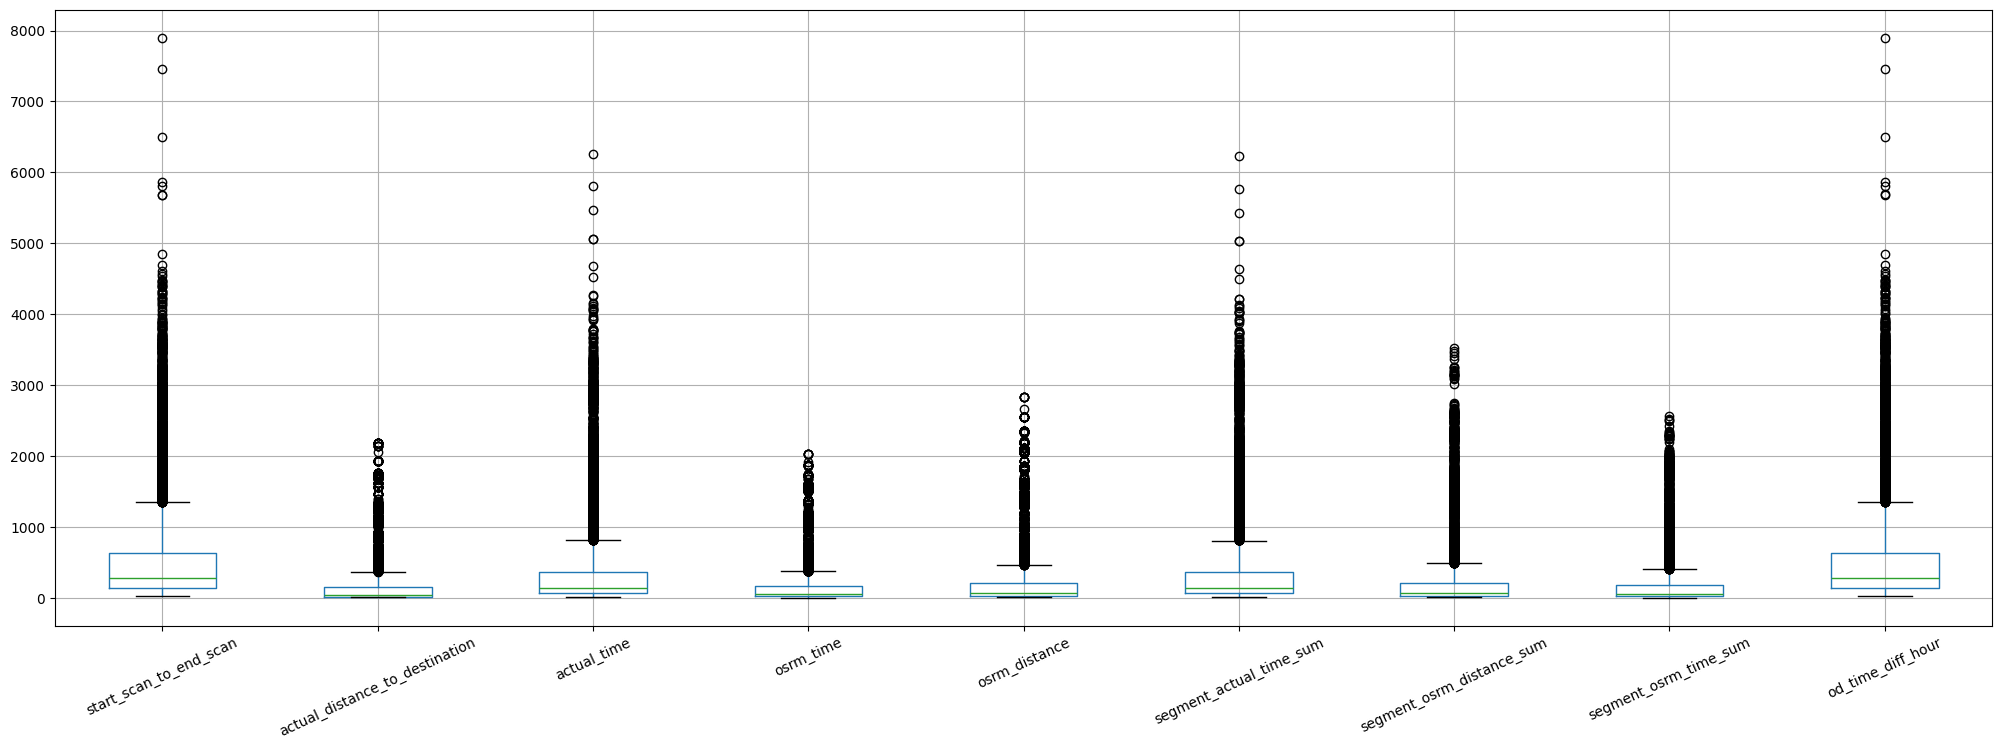

In [ ]:
trip[num_cols].boxplot(rot=25, figsize=(25,8))

In [ ]:
Q1 = trip[num_cols].quantile(0.25)
Q3 = trip[num_cols].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
trip = trip[~((trip[num_cols] < (Q1 - 1.5 * IQR)) | (trip[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
trip = trip.reset_index(drop=True)

In [ ]:
trip

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,...,source_city,source_place,source_place_code,trip_year,trip_month,trip_hour,trip_day,trip_week,trip_dayofweek,route_name
0,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,doddablpur_chikadpp_d (karnataka),IND561203AAB,doddablpur_chikadpp_d (karnataka),180.0,...,doddablpur,chikadpp,d,2018,9,0,12,37,2,doddablpur to doddablpur
1,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,mumbai hub (maharashtra),IND401104AAA,mumbai_mirard_ip (maharashtra),100.0,...,mumbai,mumbai hub,None,2018,9,0,12,37,2,mumbai to mumbai
2,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,bellary_dc (karnataka),IND583119AAA,sandur_wrdn1dpp_d (karnataka),717.0,...,bellary,bellary,None,2018,9,0,12,37,2,bellary to sandur
3,training,2018-09-12 00:02:34.161600,thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...,Carting,trip-153671055416136166,IND600056AAA,chennai_poonamallee (tamil nadu),IND600056AAA,chennai_poonamallee (tamil nadu),189.0,...,chennai,chennai,None,2018,9,0,12,37,2,chennai to chennai
4,training,2018-09-12 00:04:22.011653,thanos::sroute:a97698cc-846e-41a7-916b-88b1741...,Carting,trip-153671066201138152,IND600044AAD,chennai_chrompet_dpc (tamil nadu),IND600048AAA,chennai_vandalur_dc (tamil nadu),98.0,...,chennai,chrompet,dpc,2018,9,0,12,37,2,chennai to chennai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12718,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,trip-153861095625827784,IND160002AAC,chandigarh_mehmdpur_h (punjab),IND160002AAC,chandigarh_mehmdpur_h (punjab),257.0,...,chandigarh,mehmdpur,h,2018,10,23,3,40,2,chandigarh to chandigarh
12719,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,trip-153861104386292051,IND121004AAB,fbd_balabhgarh_dpc (haryana),IND121004AAA,faridabad_blbgarh_dc (haryana),60.0,...,fbd,balabhgarh,dpc,2018,10,23,3,40,2,fbd to faridabad
12720,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,trip-153861106442901555,IND208006AAA,kanpur_govndngr_dc (uttar pradesh),IND208006AAA,kanpur_govndngr_dc (uttar pradesh),421.0,...,kanpur,govndngr,dc,2018,10,23,3,40,2,kanpur to kanpur
12721,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND627005AAA,tirunelveli_vdkkusrt_i (tamil nadu),IND628204AAA,tirchchndr_shnmgprm_d (tamil nadu),347.0,...,tirunelveli,vdkkusrt,i,2018,10,23,3,40,2,tirunelveli to tirchchndr


<Axes: >

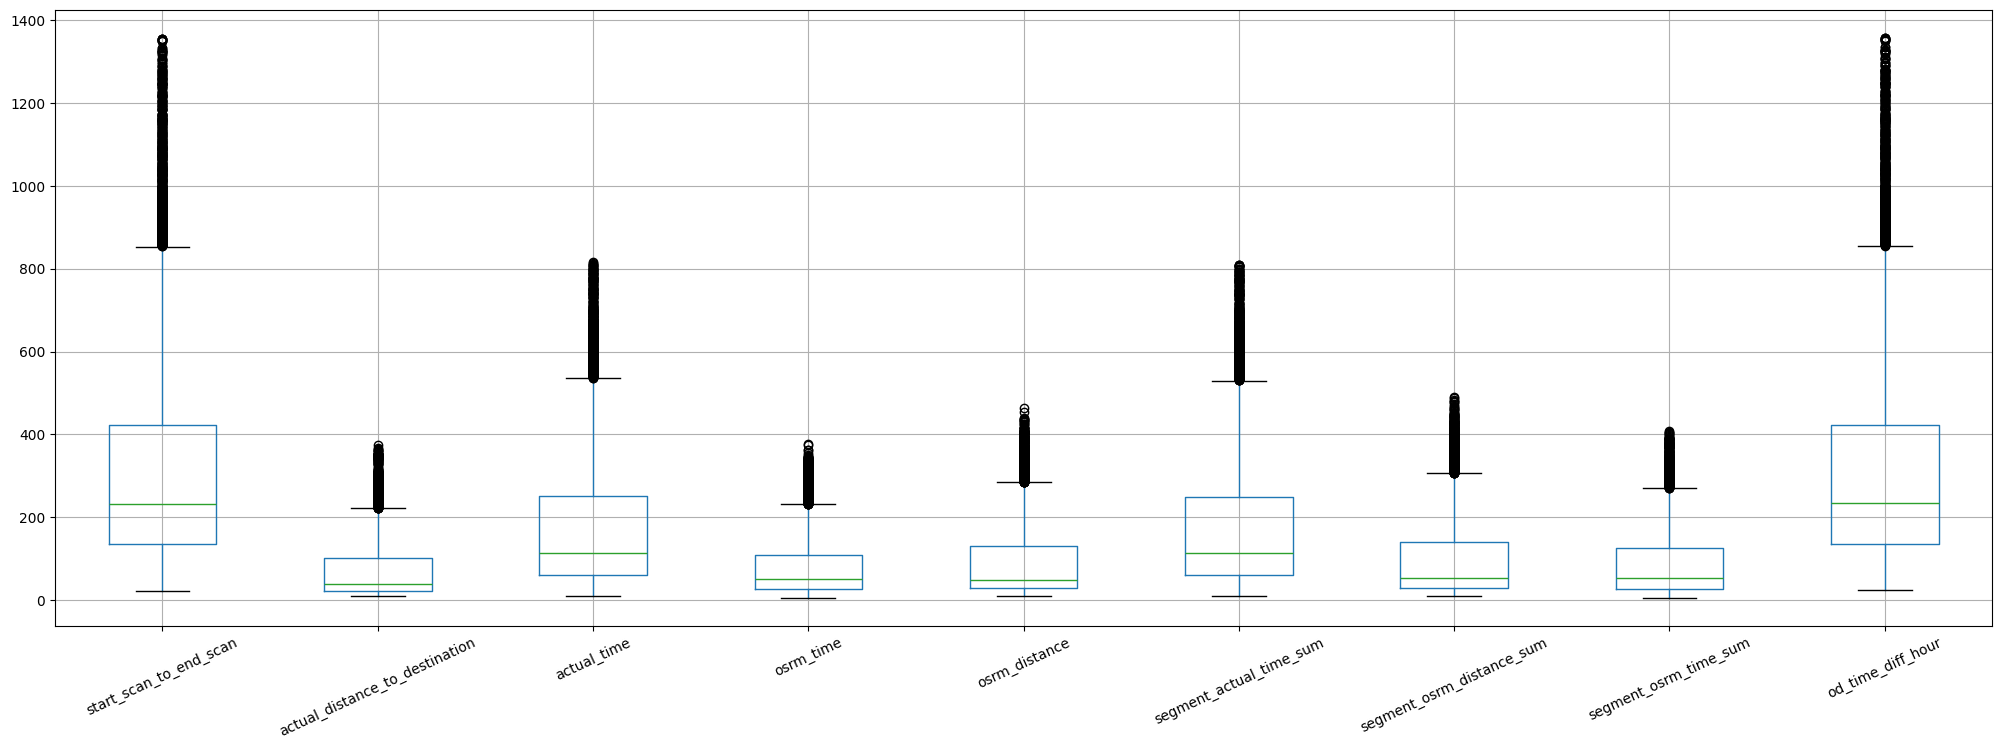

In [ ]:
trip[num_cols].boxplot(rot=25, figsize=(25,8))

# One hot encoding

In [ ]:
# Let's Pick route_type for one hot encoding

trip['route_type'].value_counts()

,count
route_type,
Carting,8812
FTL,3911


In [ ]:
trip['route_type']=trip['route_type'].map({'FTL':0,'Carting':1})

# Normalize/ Standardize the numerical features using MinMaxScaler or StandardScaler

In [ ]:
trip[num_cols]

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,od_time_diff_hour
0,180.0,73.186911,143.0,68.0,85.1110,141.0,84.1894,65.0,181.611874
1,100.0,17.175274,59.0,15.0,19.6800,59.0,19.8766,16.0,100.494935
2,717.0,127.448500,341.0,117.0,146.7918,340.0,146.7919,115.0,718.349042
3,189.0,24.597048,61.0,23.0,28.0647,60.0,28.0647,23.0,190.487849
4,98.0,9.100510,24.0,13.0,12.0184,24.0,12.0184,13.0,98.005634
...,...,...,...,...,...,...,...,...,...
12718,257.0,57.762332,83.0,62.0,73.4630,82.0,64.8551,62.0,258.028928
12719,60.0,15.513784,21.0,12.0,16.0882,21.0,16.0883,11.0,60.590521
12720,421.0,38.684839,282.0,48.0,58.9037,281.0,104.8866,88.0,422.119867
12721,347.0,134.723836,264.0,179.0,171.1103,258.0,223.5324,221.0,348.512862


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()
scaler.fit(trip[num_cols])

StandardScaler()

In [ ]:
trip[num_cols] = scaler.transform(trip[num_cols])

In [ ]:
trip[num_cols]

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,od_time_diff_hour
0,-0.548546,0.012060,-0.217856,-0.144341,-0.073948,-0.221500,-0.145358,-0.262662,-0.544839
1,-0.861602,-0.765152,-0.749015,-0.877085,-0.804506,-0.743482,-0.823653,-0.878225,-0.861856
2,1.552838,0.764988,1.034163,0.533102,0.614738,1.045260,0.514899,0.365464,1.552812
3,-0.513328,-0.662169,-0.736369,-0.766482,-0.710888,-0.737116,-0.737295,-0.790288,-0.510150
4,-0.869428,-0.877197,-0.970332,-0.904736,-0.890050,-0.966279,-0.906532,-0.915913,-0.871585
...,...,...,...,...,...,...,...,...,...
12718,-0.247231,-0.201970,-0.597255,-0.227293,-0.204002,-0.597073,-0.349273,-0.300349,-0.246189
12719,-1.018130,-0.788207,-0.989302,-0.918561,-0.844610,-0.985376,-0.863608,-0.941038,-1.017809
12720,0.394533,-0.466688,0.661086,-0.420848,-0.366561,0.669688,0.072932,0.026276,0.395103
12721,0.104957,0.865940,0.547267,1.390274,0.886261,0.523279,1.324267,1.697092,0.107436


In [ ]:
trip[num_cols].describe()

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,od_time_diff_hour
count,1.272300e+04,1.272300e+04,1.272300e+04,1.272300e+04,1.272300e+04,1.272300e+04,1.272300e+04,1.272300e+04,1.272300e+04
mean,-1.619566e-17,-7.371818e-17,-8.041983e-17,4.467769e-17,3.797603e-17,-3.127438e-17,-8.488760e-17,6.031487e-17,7.818595e-18
std,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00
min,-1.162918e+00,-8.785574e-01,-1.065181e+00,-1.001514e+00,-9.229378e-01,-1.061764e+00,-9.375981e-01,-1.003850e+00,-1.162915e+00
25%,-7.207269e-01,-7.065920e-01,-7.363685e-01,-7.111809e-01,-7.077649e-01,-7.371165e-01,-7.228116e-01,-7.274750e-01,-7.210516e-01
50%,-3.411472e-01,-4.689012e-01,-4.012322e-01,-3.931975e-01,-4.836339e-01,-3.997380e-01,-4.628077e-01,-4.134119e-01,-3.418602e-01
75%,4.023595e-01,4.073375e-01,4.650634e-01,4.224989e-01,4.419548e-01,4.596223e-01,4.488499e-01,4.910897e-01,4.020802e-01
max,4.049455e+00,4.178358e+00,4.031419e+00,4.113871e+00,4.150641e+00,4.037107e+00,4.130135e+00,4.046283e+00,4.050310e+00


# Insights and Recommendations



*   From state point of view, we have heavy traffic in Mahrashtra followed by Karnataka and Haryana. This is a good indicator that we need to plan for resources on ground in these 3 states on priority. Especially, during festive seasons.
*Bangalor,Gurgaon,Mumbai,delhi,bhiwandi,hyderbad,pune,chennai are all top tier city and has the maximum trips
*actual time ,actual distance are different from osrm time and osrm distance
* Data is of only two months so seasonal or monthly ,yearly patterns can be track
*Low presence in north eastern states
*od_time_diff_hour , actual_time,osrm_time are also different




# Action Items



* Revisit information fed to routing engine for trip planning. Check for discrepancies with transporters, if the routing engine is configured for optimum results
* Provide data of long duration so get seasonal patterns,monthly trend can be track